# JUMPlus Python Project 1
## FIFA Dataset Basic Operations
### by Nicholas Crossman
First, we import pandas and load data from the `.csv` file.

We'll print out the first 5 players, to see what kind of data we're dealing with.

In [3]:
import pandas as pd

data = pd.read_csv("players_20.csv")
print(data.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...    lwb   ldm  \
0        170         72   Argentina         FC Bar

## Getting Column Information

As we can see, there are a lot of columns. Let's get a list of the column names.

In [4]:
col_names = list(data)
print(col_names)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

Let's check how many rows and columns the data set has in total.

In [5]:
info = data.shape
rows = str(info[0])
cols = str(info[1])
print("Rows: " + rows)
print("Columns: " + cols)

Rows: 18278
Columns: 104


We'll start with a basic query to see how Pandas DataFrames can be manipulated.
Let's show the number of players from each country, sorted in descending order by player count.

In [6]:
players_by_country = data.groupby("nationality").size().sort_values(ascending=False).head(10)
print(players_by_country)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
dtype: int64


The `.size()` call counts the number of players in each country group, and the `sort_values()` call orders 
the list by this count, with the `ascending` flag set to `False`.

We use `head(10)` to select the first 10 players from this resulting DataFrame.

## Visualization

Let's try making some visual aids to better convey this information. 
The `data_frame.plot.bar()` function will produce a bar graph from an existing DataFrame. 

We need to import `matplotlib.pyplot` to make the visualizations of our Pandas data. 

By default, the bar plot will give each bar a different color, but we will set them all to green.

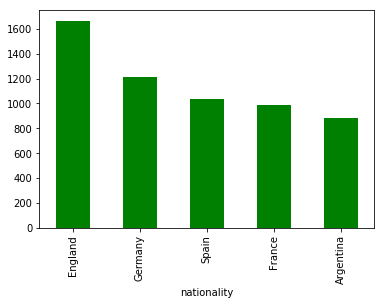

In [6]:
import matplotlib.pyplot as plt

plt.figure() # sets up the canvas
# get the top 5 countries
players_by_country_plot = data.groupby("nationality").size().sort_values(ascending=False).head()
players_by_country_plot.plot.bar(color='green')

Let's make a few more queries to practice.

First, we'll find the first 5 players, and display their short name and wages.

In [8]:
name_and_wages = data.head()[['short_name', 'wage_eur']]
print(name_and_wages)

          short_name  wage_eur
0           L. Messi    565000
1  Cristiano Ronaldo    405000
2          Neymar Jr    290000
3           J. Oblak    125000
4          E. Hazard    470000


Let's show the name and wages of the 5 highest paid players.

In [10]:
name_and_wages_by_salary = data.sort_values('wage_eur', ascending=False).head()[['short_name', 'wage_eur']]
print(name_and_wages_by_salary)

           short_name  wage_eur
0            L. Messi    565000
4           E. Hazard    470000
1   Cristiano Ronaldo    405000
5        K. De Bruyne    370000
22       A. Griezmann    370000


Let's show this as another bar plot. We'll specify the `x` and `y` axis so the index isn't shown instead.

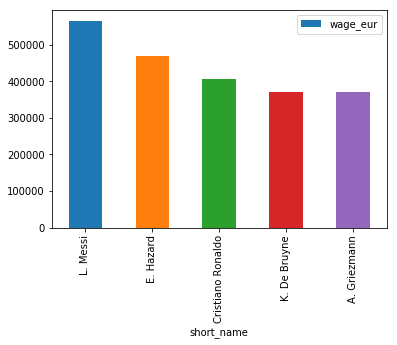

In [12]:
name_and_wages_by_salary.plot.bar(x='short_name', y='wage_eur')

Let's find the first 10 players from Germany.

In [19]:
german_players = data[data['nationality'] == 'Germany'].head(10)
print(german_players)

     sofifa_id                                         player_url  \
6       192448  https://sofifa.com/player/192448/marc-andre-te...   
31      167495  https://sofifa.com/player/167495/manuel-neuer/...   
36      182521  https://sofifa.com/player/182521/toni-kroos/20...   
37      188350  https://sofifa.com/player/188350/marco-reus/20...   
49      178603  https://sofifa.com/player/178603/mats-hummels/...   
55      222492  https://sofifa.com/player/222492/leroy-sane/20...   
61      212622  https://sofifa.com/player/212622/joshua-kimmic...   
70      189596  https://sofifa.com/player/189596/thomas-muller...   
77      212190  https://sofifa.com/player/212190/niklas-sule/2...   
109     235790  https://sofifa.com/player/235790/kai-havertz/2...   

        short_name              long_name  age         dob  height_cm  \
6    M. ter Stegen  Marc-André ter Stegen   27  1992-04-30        187   
31        M. Neuer           Manuel Neuer   33  1986-03-27        193   
36        T. Kroos   

Now, let's sort the top 5 German players by height, weight, and wages.

In [20]:
german_players_sorted = data[data['nationality'] == 'Germany'].sort_values(['height_cm', 'weight_kg', 'wage_eur'], ascending=False).head()
print(german_players_sorted)

       sofifa_id                                         player_url  \
8016      236831  https://sofifa.com/player/236831/aaron-seydel/...   
1389      199833  https://sofifa.com/player/199833/lars-unnersta...   
1217      200212  https://sofifa.com/player/200212/michael-esser...   
13576     239746  https://sofifa.com/player/239746/lukas-watkowi...   
518       179783  https://sofifa.com/player/179783/ralf-fahrmann...   

          short_name        long_name  age         dob  height_cm  weight_kg  \
8016       A. Seydel     Aaron Seydel   23  1996-02-07        199         90   
1389   L. Unnerstall  Lars Unnerstall   28  1990-07-20        198        103   
1217        M. Esser    Michael Esser   31  1987-11-22        198         97   
13576   L. Watkowiak  Lukas Watkowiak   23  1996-03-06        197        103   
518      R. Fährmann    Ralf Fährmann   30  1988-09-27        197         98   

      nationality                club  ...    lwb   ldm   cdm   rdm   rwb  \
8016      Germa

Let's go back and show the short name and wages of the first 5 German players.

In [22]:
all_german_players = data[data['nationality'] == 'Germany']
name_and_wages_german = all_german_players.head()[['short_name', 'wage_eur']]
print(name_and_wages_german)

       short_name  wage_eur
6   M. ter Stegen    250000
31       M. Neuer    155000
36       T. Kroos    330000
37        M. Reus    170000
49     M. Hummels    130000


## Metrics

The dataset from FIFA has a lot of columns, including measurements of different aspects of the players' performance.

Let's try to find the top 5 players in the world by their shooting skills.
The dataset lists this attribute as `shooting`.

In [24]:
best_shooters = data.sort_values('shooting', ascending=False).head()[['short_name', 'shooting']]
print(best_shooters)

            short_name  shooting
1    Cristiano Ronaldo      93.0
0             L. Messi      92.0
12             H. Kane      91.0
17           S. Agüero      90.0
205    F. Quagliarella      89.0


Next we will get the top 5 defenders in the world, and show more information about them.

In [25]:
best_defenders = data.sort_values('defending', ascending=False).head()[['short_name', 'defending', 'nationality', 'club']]
print(best_defenders)

      short_name  defending  nationality               club
16  G. Chiellini       90.0        Italy           Juventus
7    V. van Dijk       90.0  Netherlands          Liverpool
11  K. Koulibaly       89.0      Senegal             Napoli
35      D. Godín       89.0      Uruguay              Inter
49    M. Hummels       89.0      Germany  Borussia Dortmund


### Real Madrid

Finally, let's list some information of Real Madrid players.

In [28]:
real_madrid = data[data['club'] == 'Real Madrid']

First their wages.

In [32]:
real_madrid_wages = real_madrid.head()[['short_name', 'wage_eur']]
print(real_madrid_wages)

      short_name  wage_eur nationality
4      E. Hazard    470000     Belgium
8      L. Modrić    340000     Croatia
18  Sergio Ramos    300000       Spain
28   T. Courtois    235000     Belgium
36      T. Kroos    330000     Germany


Then their shooting.

In [33]:
real_madrid_shooting = real_madrid.head()[['short_name', 'shooting']]
print(real_madrid_shooting)

      short_name  shooting nationality
4      E. Hazard      83.0     Belgium
8      L. Modrić      76.0     Croatia
18  Sergio Ramos      68.0       Spain
28   T. Courtois       NaN     Belgium
36      T. Kroos      80.0     Germany


Then their defending score.

In [34]:
real_madrid_defending = real_madrid.head()[['short_name', 'defending']]
print(real_madrid_defending)

      short_name  defending
4      E. Hazard       35.0
8      L. Modrić       72.0
18  Sergio Ramos       87.0
28   T. Courtois        NaN
36      T. Kroos       70.0


And finally their nationality.

In [35]:
real_madrid_nationality = real_madrid.head()[['short_name', 'nationality']]
print(real_madrid_nationality)

      short_name nationality
4      E. Hazard     Belgium
8      L. Modrić     Croatia
18  Sergio Ramos       Spain
28   T. Courtois     Belgium
36      T. Kroos     Germany


## Conclusion

This has been a basic practice with Pandas and Jupyter notebooks. I find them easy and enjoyable to use, and will consider 
them in future projects.